In [1]:
# Import the libraries - Lindsay

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

** Q1. Why does it make sense to discretize columns for this problem? **

A. For this problem, it is better to discretize columns as it will help capture the non-linear relationships between the continuous variables and the target variables by dividing the variable into meaningful bins. This can simplify the relationship and make it easier for a model like ca diecision tree to capture these no linear effects. Also, decision trees with discretized features can be more interpretable. The bins can be labeled and understood as categories, which might correspond to meaningful ranges that can be communicated and understood easily by humans. For example, age groups or income brackets.

**Q2. What might be the issues (if any) if we DID NOT discretize the columns**

A. One of the main issues that could be occur if we did not discretize the columns is overfitting. Decision trees can create overly complex models that overfit the data when using continuous variables. Also continuous variables can lead to trees with many branches, which makes the model difficult to interpret. Bins, on the other hand, can be named and understood as distinct categories, making the model's decisions clearer.

**Data Quality Analysis**

In [4]:
df= pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

In [5]:
# Print first few rows (Lindsay)

print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


In [6]:
# Print the DataFrame's shape (Lindsay)

print(df.shape)

(48842, 11)


In [7]:
df.info() # Valentin

# 11 features and 48842 rows
# only 1 continuous features (y = int64) whereas all others are objects (categorical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [8]:
# Missing Values - Lindsay

missing_values = df.isnull().sum()

percent_missing = df.isnull().mean()* 100

percent_missing

hours_per_week_bin    0.0
occupation_bin        0.0
msr_bin               0.0
capital_gl_bin        0.0
race_sex_bin          0.0
education_num_bin     0.0
education_bin         0.0
workclass_bin         0.0
age_bin               0.0
flag                  0.0
y                     0.0
dtype: float64

In [9]:
# data types - Lindsay

data_types = df.dtypes

data_types

hours_per_week_bin    object
occupation_bin        object
msr_bin               object
capital_gl_bin        object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64
dtype: object

In [10]:
# Value counts - Lindsay

value_counts = df.nunique()

value_counts

hours_per_week_bin    5
occupation_bin        5
msr_bin               3
capital_gl_bin        3
race_sex_bin          3
education_num_bin     5
education_bin         5
workclass_bin         2
age_bin               5
flag                  2
y                     2
dtype: int64

In [11]:
# Outlier detection - Lindsay

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    filter = (df[column] >= q1 - 1.5 * iqr) & (df[column] <= q3 + 1.5 * iqr)
    outliers = df[~filter]

print(outliers)

      hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
7       d. 41-50 & 61-70        e. High  c. High         a. = 0      c. High   
8       d. 41-50 & 61-70        e. High   b. Mid         c. > 0       b. Mid   
9               b. 31-40        e. High  c. High         c. > 0      c. High   
10             c. 71-100        e. High  c. High         a. = 0       b. Mid   
11              b. 31-40        e. High  c. High         a. = 0      c. High   
...                  ...            ...      ...            ...          ...   
48815   d. 41-50 & 61-70        e. High  c. High         a. = 0      c. High   
48816   d. 41-50 & 61-70        e. High  c. High         b. < 0      c. High   
48822           e. 51-60        e. High  c. High         c. > 0      c. High   
48826           b. 31-40        e. High  c. High         a. = 0       b. Mid   
48841           e. 51-60        e. High  c. High         a. = 0      c. High   

      education_num_bin education_bin w

In [12]:
# Descriptive Statistics -Lindsay

descriptive_stats = df.describe()

print(descriptive_stats)

                  y
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


In [13]:
# Descriptive for categorical data - Valentin
df.select_dtypes(include='object').describe(include='all')

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,5,5,3,3,3,5,5,2,5,2
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561


**Data Quality Report**

In [14]:
quality_report = pd.DataFrame({'Missing Values': missing_values,
                               'Percent Missing': percent_missing,
                               'Data Type': data_types,
                               'Number of Unique Values': value_counts})
print(quality_report)

                    Missing Values  Percent Missing Data Type  \
hours_per_week_bin               0              0.0    object   
occupation_bin                   0              0.0    object   
msr_bin                          0              0.0    object   
capital_gl_bin                   0              0.0    object   
race_sex_bin                     0              0.0    object   
education_num_bin                0              0.0    object   
education_bin                    0              0.0    object   
workclass_bin                    0              0.0    object   
age_bin                          0              0.0    object   
flag                             0              0.0    object   
y                                0              0.0     int64   

                    Number of Unique Values  
hours_per_week_bin                        5  
occupation_bin                            5  
msr_bin                                   3  
capital_gl_bin                     

## Build the Decision Tree Classifier Models

In [15]:
# assign y (i.e., DV) and X (i.e., IVs) - Valentin
y = df['y'] # assign y (our target)
X = df.drop('y', axis=1) # assign features (IVs, without our target)

# convert features to categorical (one-hot encoding)
X = pd.get_dummies(X, columns=['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin',
                               'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin'])
    # problem: don't know why these weren't converted to dummies

# I'm checking if there are any non-numeric columns after the one-hot encoding, because the output suggested there were non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=['float64', 'int64']).columns
if len(non_numeric_columns) > 0:
    print("Non-numeric columns found:", non_numeric_columns)

# doing another one-hot encoding, but don't know why it works this time
X = pd.get_dummies(X, columns=non_numeric_columns)

Non-numeric columns found: Index(['flag', 'hours_per_week_bin_a. 0-30', 'hours_per_week_bin_b. 31-40',
       'hours_per_week_bin_c. 71-100', 'hours_per_week_bin_d. 41-50 & 61-70',
       'hours_per_week_bin_e. 51-60', 'occupation_bin_a. Low',
       'occupation_bin_b. Mid - Low', 'occupation_bin_c. Mid - Mid',
       'occupation_bin_d. Mid - High', 'occupation_bin_e. High',
       'msr_bin_a. Low', 'msr_bin_b. Mid', 'msr_bin_c. High',
       'capital_gl_bin_a. = 0', 'capital_gl_bin_b. < 0',
       'capital_gl_bin_c. > 0', 'race_sex_bin_a. Low', 'race_sex_bin_b. Mid',
       'race_sex_bin_c. High', 'education_num_bin_a. 0-8',
       'education_num_bin_b. 9-12', 'education_num_bin_c. 13',
       'education_num_bin_d. 14', 'education_num_bin_e. 15+',
       'education_bin_a. Low', 'education_bin_b. Mid',
       'education_bin_c. Bachelors', 'education_bin_d. Masters',
       'education_bin_e. High', 'workclass_bin_a. no income',
       'workclass_bin_b. income', 'age_bin_a. 0-25',
      

In [16]:
# import all necessary libraries - Valentin
from sklearn.tree import DecisionTreeClassifier # for decision tree algorithms
from sklearn.model_selection import train_test_split # for training, testing, and splitting the data
from sklearn import metrics # for calculating performance metrics
import time # evaluate the execution time of each model

# import sklearn.tree import DecisionTreeClassifier - Valentin
    # it's a CART algorithm that's used for:
        # 1. binary classes
        # 2. multi-class classifications
        # 3. regressions

# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [17]:
# build the model - Valentin

# train, test, and split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

# set up our decision tree model
dtree = DecisionTreeClassifier(max_depth=10, random_state=99, max_features=None, min_samples_leaf=15)

# build a decision tree classifier from our training data
dtree.fit(X_train, y_train)

# predict class value for X
y_pred = dtree.predict(X_test)

In [18]:
# Evaluate the decision tree performance - Valentin

# calculate the accuracy score
score = metrics.accuracy_score(y_test, y_pred)

# calculate the confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])

# convert confusion matrix to pandas df and display the matrix as a table
confusion_df = pd.DataFrame(confusion, index = ['>$50K', '<$50K'], columns=[">$50K", "<$50K"])
confusion_df

,>$50K,<$50K
>$50K,11404,801
<$50K,1813,2100


## Hyper-Parameter Tuning

### Further model building and evaluation with the implementation of hyper-parameters

#### Overview of the 4 hyper-parameters we're experimenting with:

1. Split Criteria: criterion='gini' and criterion='entropy'
2. Maximum Features: the number of features to consider when looking for best split
3. Minimum Sample Leaf: the minimum number of samples required to be at a leaf node
4. Maximum Depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

The hyper-parameters will run separately, and each run is continued based on the previous hyper-parameters "best" prediction

The default for each hyper-parameter is:
  1.  criterion = 'gini'
  2. max_features = None
  3. min_samples_leaf = 1
  4. max_depth = None

Each hyper-parameters value is set to default while we're testing the previous hyper-parameter

### Hyper-parameter: split criteria

In [19]:
#Importing necessary libraries #Andrea
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
import time

In [20]:
#defining variable #Andrea
max_depth = None # Change this value to adjust the depth of the tree

In [21]:
# Valentin
# build a decision tree classifier from our training data
dtree.fit(X_train, y_train)

# predict class value for X
y_pred = dtree.predict(X_test)

# generate empty columns to later display the tables
results_acc = []
results_recall = []
results_precision = []
results_f1 = []

criterion = ['gini','entropy']

# calculate the performance metrics
for criterion_value in criterion:
    start_time = time.time() # start timer
    model = DecisionTreeClassifier(criterion=criterion_value, max_depth=None, random_state=99, max_features=None, min_samples_leaf=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred) # accuracy score
    recall = metrics.recall_score(y_test, y_pred) # recall score
    precision = metrics.precision_score(y_test, y_pred) # precision score, might need to set a zero_division parameter
    f1_score = metrics.f1_score(y_test, y_pred)
    results_acc.append(accuracy)
    results_recall.append(recall)
    results_precision.append(precision)
    results_f1.append(f1_score)
    elapsed_time = time.time() - start_time  # calculate elapsed time
    print(f"Execution time for max_depth={max_depth}: {elapsed_time:.4f} seconds")  # print the time


# convert confusion matrix to pandas df and display the matrix as a table
confusion_df = pd.DataFrame(confusion, index = ['>$50K', '<$50K'], columns=[">$50K", "<$50K"])


# Assuming you already have results_acc, results_recall, results_precision, and results_f1 lists

# Create a DataFrame
results_df = pd.DataFrame({
    'Criterion': criterion,
    'Accuracy': results_acc,
    'Recall': results_recall,
    'Precision': results_precision,
    'F1 Score': results_f1
})

# Display the DataFrame
print('Confusion Matrix\n',confusion_df, '\n')
results_df

Execution time for max_depth=None: 0.2404 seconds
Execution time for max_depth=None: 0.2386 seconds
Confusion Matrix
        >$50K  <$50K
>$50K  11404    801
<$50K   1813   2100 



,Criterion,Accuracy,Recall,Precision,F1 Score
0,gini,0.826902,0.550217,0.676406,0.606821
1,entropy,0.826033,0.548428,0.674207,0.604848


### Hyper-parameter: Minimum Sample Leaf
Keep: criterion = 'gini'

In [22]:
# Valentin
# build a decision tree classifier from our training data
dtree.fit(X_train, y_train)

# predict class value for X
y_pred = dtree.predict(X_test)

# generate empty columns to later display the tables
results_acc = []
results_recall = []
results_precision = []
results_f1 = []

min_sample_leaf = [5, 10, 15, 20, 25, 30, 35, 40]

# calculate the performance metrics
for min_leaf in min_sample_leaf:
    start_time = time.time()
    model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=99, max_features=None, min_samples_leaf=min_leaf)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred) # accuracy score
    recall = metrics.recall_score(y_test, y_pred) # recall score
    precision = metrics.precision_score(y_test, y_pred) # precision score, might need to set a zero_division parameter
    f1_score = metrics.f1_score(y_test, y_pred)
    results_acc.append(accuracy)
    results_recall.append(recall)
    results_precision.append(precision)
    results_f1.append(f1_score)
    elapsed_time = time.time() - start_time  # calculate elapsed time
    print(f"Execution time for max_depth={max_depth}: {elapsed_time:.4f} seconds")  # print the time


# convert confusion matrix to pandas df and display the matrix as a table
confusion_df = pd.DataFrame(confusion, index = ['>$50K', '<$50K'], columns=[">$50K", "<$50K"])


# Assuming you already have results_acc, results_recall, results_precision, and results_f1 lists

# Create a DataFrame
results_df = pd.DataFrame({
    'Min Sample Leaf': min_sample_leaf,
    'Accuracy': results_acc,
    'Recall': results_recall,
    'Precision': results_precision,
    'F1 Score': results_f1
})

# Display the DataFrame
print('Confusion Matrix\n',confusion_df, '\n')
results_df

Execution time for max_depth=None: 0.2367 seconds
Execution time for max_depth=None: 0.2290 seconds
Execution time for max_depth=None: 0.2200 seconds
Execution time for max_depth=None: 0.2160 seconds
Execution time for max_depth=None: 0.2211 seconds
Execution time for max_depth=None: 0.2113 seconds
Execution time for max_depth=None: 0.2110 seconds
Execution time for max_depth=None: 0.1969 seconds
Confusion Matrix
        >$50K  <$50K
>$50K  11404    801
<$50K   1813   2100 



,Min Sample Leaf,Accuracy,Recall,Precision,F1 Score
0,5,0.835339,0.559928,0.701569,0.622797
1,10,0.836766,0.557884,0.707847,0.623982
2,15,0.835960,0.560951,0.703300,0.624111
3,20,0.838193,0.566573,0.708533,0.629651
4,25,0.837945,0.558651,0.711820,0.626002
5,30,0.839558,0.561717,0.716194,0.629619
6,35,0.838441,0.567084,0.709172,0.630219
7,40,0.837325,0.551751,0.713247,0.622190


### Hyper-parameter: Maximum Feature
Keep:
1. Criterion = 'gini'
2. Minimum Sample Leaf = 5

In [23]:
# Valentin
# build a decision tree classifier from our training data
dtree.fit(X_train, y_train)

# predict class value for X
y_pred = dtree.predict(X_test)

# generate empty columns to later display the tables
results_acc = []
results_recall = []
results_precision = []
results_f1 = []

max_feature = [None, 'sqrt', 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# calculate the performance metrics
for max_feat in max_feature:
    start_time = time.time()
    model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=99, max_features=max_feat, min_samples_leaf=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred) # accuracy score
    recall = metrics.recall_score(y_test, y_pred) # recall score
    precision = metrics.precision_score(y_test, y_pred) # precision score, might need to set a zero_division parameter
    f1_score = metrics.f1_score(y_test, y_pred)
    results_acc.append(accuracy)
    results_recall.append(recall)
    results_precision.append(precision)
    results_f1.append(f1_score)
    elapsed_time = time.time() - start_time  # calculate elapsed time
    print(f"Execution time for max_depth={max_depth}: {elapsed_time:.4f} seconds")  # print the time

# convert confusion matrix to pandas df and display the matrix as a table
confusion_df = pd.DataFrame(confusion, index = ['>$50K', '<$50K'], columns=[">$50K", "<$50K"])


# Assuming you already have results_acc, results_recall, results_precision, and results_f1 lists

# Create a DataFrame
results_df = pd.DataFrame({
    'Max Feature': max_feature,
    'Accuracy': results_acc,
    'Recall': results_recall,
    'Precision': results_precision,
    'F1 Score': results_f1
})

# Display the DataFrame
print('Confusion Matrix\n',confusion_df, '\n')
results_df

Execution time for max_depth=None: 0.2219 seconds
Execution time for max_depth=None: 0.0697 seconds
Execution time for max_depth=None: 0.1028 seconds
Execution time for max_depth=None: 0.1167 seconds
Execution time for max_depth=None: 0.1345 seconds
Execution time for max_depth=None: 0.1601 seconds
Execution time for max_depth=None: 0.1832 seconds
Execution time for max_depth=None: 0.1946 seconds
Confusion Matrix
        >$50K  <$50K
>$50K  11404    801
<$50K   1813   2100 



,Max Feature,Accuracy,Recall,Precision,F1 Score
0,None,0.835339,0.559928,0.701569,0.622797
1,sqrt,0.835712,0.552262,0.706902,0.620086
2,0.3,0.835898,0.556606,0.705311,0.622197
3,0.4,0.836952,0.549451,0.713101,0.620670
4,0.5,0.836208,0.563251,0.703030,0.625426
5,0.6,0.837201,0.561973,0.707301,0.626317
6,0.7,0.835277,0.557628,0.702511,0.621741
7,0.8,0.836394,0.561462,0.704618,0.624947


### Hyper-parameter: Maximum Depth
Keep:
1. Criterion = 'gini'
2. Minimum Sample Leaf = 5
3. Maximum Feature = 5

In [24]:
# Valentin
# build a decision tree classifier from our training data
dtree.fit(X_train, y_train)

# predict class value for X
y_pred = dtree.predict(X_test)

# generate empty columns to later display the tables
results_acc = []
results_recall = []
results_precision = []
results_f1 = []

max_depths = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# calculate the performance metrics
for max_depth in max_depths:
    start_time = time.time() # start timer
    model = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=99, max_features=5, min_samples_leaf=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred) # accuracy score
    recall = metrics.recall_score(y_test, y_pred) # recall score
    precision = metrics.precision_score(y_test, y_pred) # precision score, might need to set a zero_division parameter
    f1_score = metrics.f1_score(y_test, y_pred)
    results_acc.append(accuracy)
    results_recall.append(recall)
    results_precision.append(precision)
    results_f1.append(f1_score)
    elapsed_time = time.time() - start_time  # calculate elapsed time
    print(f"Execution time for max_depth={max_depth}: {elapsed_time:.4f} seconds")  # print the time

# convert confusion matrix to pandas df and display the matrix as a table
confusion_df = pd.DataFrame(confusion, index = ['>$50K', '<$50K'], columns=[">$50K", "<$50K"])


# Assuming you already have results_acc, results_recall, results_precision, and results_f1 lists

# Create a DataFrame
results_df = pd.DataFrame({
    'Max Depth': max_depths,
    'Accuracy': results_acc,
    'Recall': results_recall,
    'Precision': results_precision,
    'F1 Score': results_f1
})

# Display the DataFrame
print('Confusion Matrix\n',confusion_df, '\n')
results_df

Execution time for max_depth=2: 0.0371 seconds
Execution time for max_depth=4: 0.0415 seconds
Execution time for max_depth=6: 0.0446 seconds
Execution time for max_depth=8: 0.0476 seconds
Execution time for max_depth=10: 0.0505 seconds
Execution time for max_depth=12: 0.0567 seconds
Execution time for max_depth=14: 0.0575 seconds
Execution time for max_depth=16: 0.0589 seconds
Execution time for max_depth=18: 0.0612 seconds
Execution time for max_depth=20: 0.0644 seconds
Confusion Matrix
        >$50K  <$50K
>$50K  11404    801
<$50K   1813   2100 



,Max Depth,Accuracy,Recall,Precision,F1 Score
0,2,0.779998,0.117557,0.831826,0.206001
1,4,0.819332,0.466394,0.688939,0.556233
2,6,0.813935,0.472783,0.664034,0.552321
3,8,0.814927,0.588551,0.626496,0.606931
4,10,0.830996,0.503194,0.716260,0.591114
5,12,0.835650,0.525939,0.721599,0.608426
6,14,0.836580,0.533606,0.720746,0.613216
7,16,0.836704,0.551239,0.711177,0.621077
8,18,0.836518,0.540762,0.716317,0.616281
9,20,0.835836,0.539228,0.714528,0.614623


# Visualize Decision Tree Using GraphViz

In [25]:
# import GraphViz Library (Lindsay)

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

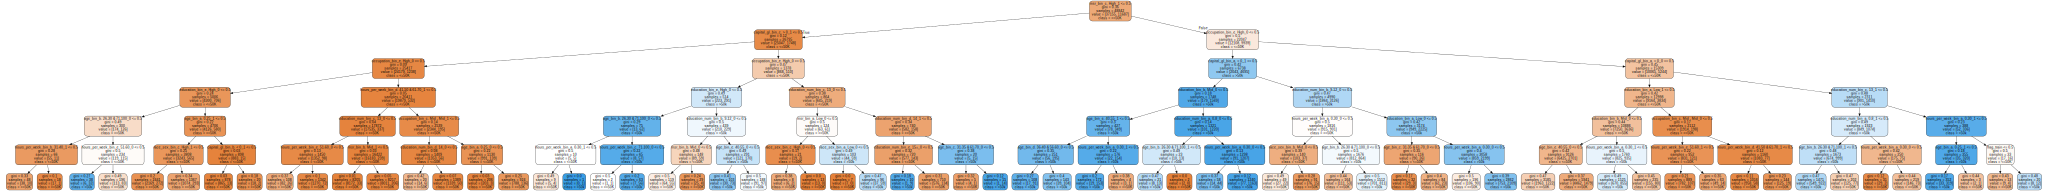

In [26]:
# Plot tree
# Export_graphviz documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

dtree= DecisionTreeClassifier(max_depth= 6)
dtree.fit(X, y)

dot_data = export_graphviz(dtree, out_file=None,
                           feature_names= X.columns,
                           class_names=['<=50K', '>50k'],
                           rounded=True, proportion=False,
                           precision=2, filled=True)

graph= graphviz.Source(dot_data)
graph

# Conclusion


**Q4. How long was your total run time to train the best model?**

A. The total model training time is 0.0385 seconds. Below is the code that was utilized to calculate this answer. (ANDREA)


In [27]:
# calculating total run time Andrea
import time
# Start timing
start_time = time.time()

# Model training code
model.fit(X_train, y_train)

# Stop timing
end_time = time.time()

# Calculate and print the runtime
runtime = end_time - start_time
print("Model training runtime:", runtime, "seconds")


Model training runtime: 0.046746015548706055 seconds


**Q5. Did you find the BEST TREE?**

A.The best tree that we discovered out of our trial runs was with a max depth of 6.

**Q6. Write your observations from the visualization of the best tree** (Andrea)


A. After analyzing the tree visualization, we can see how complex the tree is. We can see the different parts of the tree, but something to note is the tree entities towards the bottoms of the tree. Due to this we can concldue that overfit is presented in this case.


**Q7. Will this Tree "overfit"?** (ANDREA)


A. Considering the model's performance metrics, where the accuracy on the training set is 0.836580, we can conclude that the model demonstrates a stable and consistent accuracy across both datasets. This consistency in accuracy between the training and test sets suggests that the model is not suffering from overfitting. An overfitted model would exhibit a high accuracy on the training set but a significantly lower accuracy on the test set, due to its inability to generalize well to unseen data.

# 8. Prediction using your "trained" Decision Tree Model


In [28]:
# Define the new data point (features must be in the same order and encoded similarly as the training data)
new_individual = {
    'Hours Per Week': [48],
    'Occupation Category': ['Mid - Low'],  # This will need to be encoded
    'Marriage Status & Relationships': ['High'],  # This will need to be encoded
    'Capital Gain': [1],  # Assuming Yes is encoded as 1
    'Race-Sex Group': ['Mid'],  # This will need to be encoded
    'Number of Years of Education': [12],
    'Education Category': ['High'],  # This will need to be encoded
    'Work Class': ['Income'],  # This will need to be encoded
    'Age': [58]
}

# Create a DataFrame for the new individual
new_individual_df = pd.DataFrame(new_individual)
